In [8]:
import pandas as pd
import requests
import io
#df = pd.read_csv('creditcard_sampledata_2.csv')
url = 'https://raw.githubusercontent.com/mpike93/python_fraud_detection/main/creditcard_sampledata_2.csv'
df = pd.read_csv(url)

# drop first column
df = df.drop(df.columns[0], axis=1)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

**Natural Accuracy**

Traditional rules based method of detecting fraud

In [11]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

95.8904109589041


**Random Forest Classifier**

In [12]:
# Import the random forest model from sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data
predicted = model.predict(X_test)

**Evaluating model performance**

...of the RF model

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score, precision_recall_curve, PrecisionRecallDisplay

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2098    1]
 [  18   73]]


In [15]:
# Classification Report
class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190



In [17]:
# ROC curve

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve
roc_curve = roc_auc_score(y_test, probs[:,1])
print("ROC Curve Score:")
print(roc_curve)

ROC Curve Score:
0.9697317927427505


In [33]:
# # Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# # Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
#print(PrecisionRecallDisplay(precision, recall))


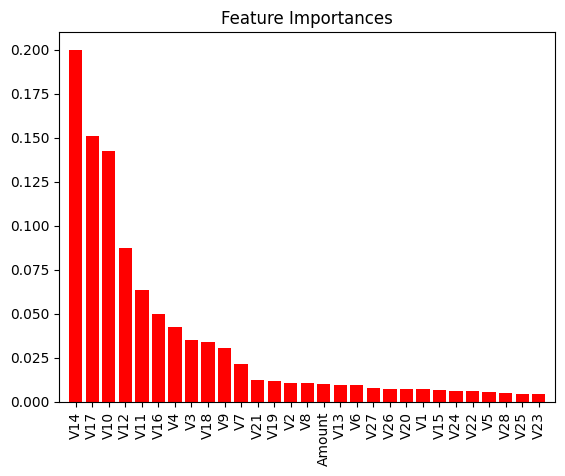

In [35]:
# Feature Importance
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()